<a href="https://colab.research.google.com/github/mali-erel/FreeCodeCamp-Pandas-Real-Life-Example/blob/master/RL_Test_V0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:


!pip install -q tensorflow
!pip install -q gym
!pip install -q keras
!pip install -q keras-rl2



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 1.6 MB/s eta 0:00:00


In [1]:
!pip install -q keras
!pip install -q keras-rl2

### Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import gym
from gym import Env
from gym.spaces import Discrete, Box
import random
import math
import tensorflow as tf
import keras
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import TensorBoard

from keras import __version__
tf.keras.__version__ = __version__

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/dtypes.py:35: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  from tensorflow.tsl.python.lib.core import pywrap_ml_dtypes


## GYM Environment Experimental

### Relay 2

In [64]:
x_rl2 = np.linspace(1.23,30,30)
TMS=0.5
y_vals = []
for x in x_rl2:
    y_vals.append(TMS*((0.14)//(x**0.02-1)))
y_rl2 = np.array(y_vals)
x_rl2.shape

(30,)

### Relay 1

In [62]:
x_rl1 = np.linspace(1.1,30,30)
TMS_rl1 = 0.67
y_rl1 =[]
for x in x_rl1:
    y_rl1.append((TMS_rl1 * ((0.14)//(x**0.02-1))))
y_rl1 = np.array(y_rl1)
x_rl1

array([ 1.1       ,  2.09655172,  3.09310345,  4.08965517,  5.0862069 ,
        6.08275862,  7.07931034,  8.07586207,  9.07241379, 10.06896552,
       11.06551724, 12.06206897, 13.05862069, 14.05517241, 15.05172414,
       16.04827586, 17.04482759, 18.04137931, 19.03793103, 20.03448276,
       21.03103448, 22.02758621, 23.02413793, 24.02068966, 25.01724138,
       26.0137931 , 27.01034483, 28.00689655, 29.00344828, 30.        ])

### Starting Graphs of Each Relays

Text(0.5, 1.0, 'Relay 1')

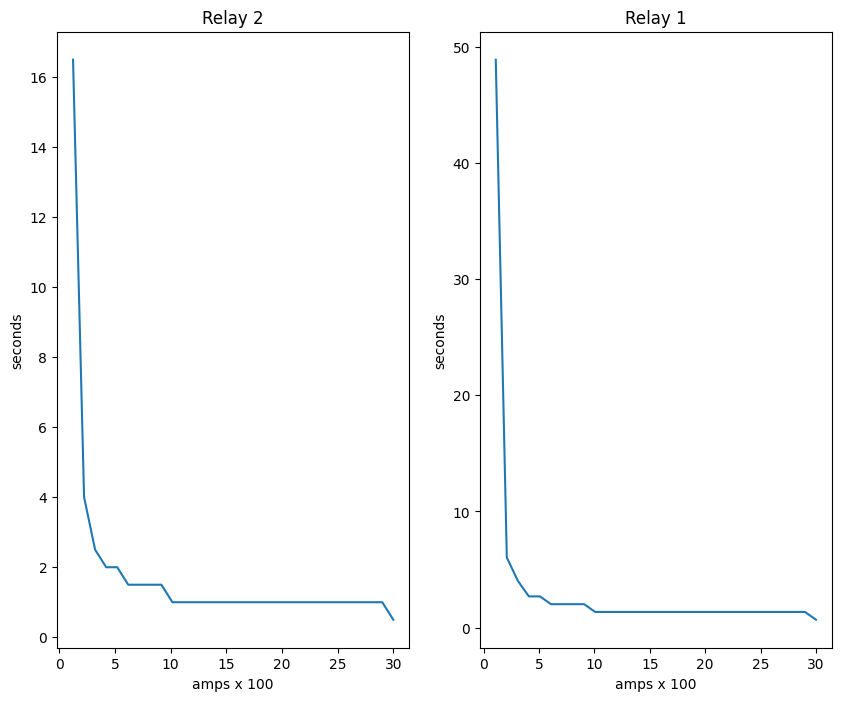

In [178]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.plot(x_rl2,y_rl2)
plt.xlabel('amps x 100')
plt.ylabel('seconds')
plt.title('Relay 2')

plt.subplot(1,2,2)
plt.plot(x_rl1,y_rl1)
plt.xlabel('amps x 100')
plt.ylabel('seconds')
plt.title('Relay 1')

### GYM Environemnt

In [455]:
x = random.uniform(0,1)
x
random.uniform(0.005,1)

0.6301460658096854

In [218]:
def customCalc(TMS_Value,x_rl1,empty_y_rl1):
  for x in x_rl1:
    value = TMS_Value*((0.14)/(x**0.02-1))
    empty_y_rl1.append(value)
  empty_y_rl1 = np.array(empty_y_rl1)
  return empty_y_rl1

class testEnv(Env):

  def __init__(self):
      # Axtions we can take: up, down, wait
      self.action_space = Discrete(3)
      # Action array
      # self.action_space = Box(low=-1.0,high=1.0,dtype=np.float32)
      self.observation_space = Box(low=0.0,high = 100.0)
      #Set start amp array
      self.state = np.linspace(1.1,30,30) + random.uniform(-1,1)
      # Set time (60 sec)
      self.time_length = 60

  def step(self,action):

      TMS_Env = 0.67
      random_add = 0
      y_Env = []

      if(action==0):
          self.time_length -= 1
          self.state += random.uniform(0.05,1)
        #  print('Action 0 -- Value:{} -- Time:{}'.format(random_add,self.time_length))
      elif(action==1):
          self.time_length -= 1
          self.state += random.uniform(-1,-0.05)
        #  print('Action 1 -- Value:{} -- Time:{}'.format(random_add,self.time_length))
      elif(action==2):
          self.state = self.state

      y_Env = customCalc(TMS_Env,self.state,y_Env)
      dt = np.mean(np.subtract(y_rl2,y_Env))

      if dt<0.55 and dt>0.39:
        reward = 10
      elif dt<0.65 and dt>0.25:
        reward = 1
      else:
          reward = -1

      if self.time_length <=0:
          done=True
      else:
          done=False

      info = {'dt':dt}#,'y_rl1':y_Env,'x_rl2':self.state}
      return self.state, reward, done, info



  def reset(self):
      self.state = np.linspace(1.1,30,30)+ random.uniform(-1,1) #+ random.randint(-2,2)
      self.time_length = 60
      return self.state

  def render(self):
    #plt.plot(self.x_rl1_dep,self.y_rl1_dep,'g')
    #plt.plot(x_rl2,y_rl2,'r')
    #plt.xlabel('Amps')
    #plt.ylabel('Seconds')
    #plt.legend(["Relay 1", "Relay 2"], loc ="lower right")
    pass

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [219]:
env = testEnv()
env.reset

<bound method testEnv.reset of <__main__.testEnv object at 0x7b68f745b760>>

In [207]:
env.action_space.sample()

1

In [208]:
env.state

array([ 2.03448021,  3.03103194,  4.02758366,  5.02413539,  6.02068711,
        7.01723884,  8.01379056,  9.01034228, 10.00689401, 11.00344573,
       11.99999746, 12.99654918, 13.9931009 , 14.98965263, 15.98620435,
       16.98275608, 17.9793078 , 18.97585953, 19.97241125, 20.96896297,
       21.9655147 , 22.96206642, 23.95861815, 24.95516987, 25.95172159,
       26.94827332, 27.94482504, 28.94137677, 29.93792849, 30.93448021])

In [209]:
env.observation_space

Box(0.0, 100.0, (1,), float32)

In [210]:
env.action_space.n

3

In [188]:
x_rl1

array([ 1.1       ,  2.09655172,  3.09310345,  4.08965517,  5.0862069 ,
        6.08275862,  7.07931034,  8.07586207,  9.07241379, 10.06896552,
       11.06551724, 12.06206897, 13.05862069, 14.05517241, 15.05172414,
       16.04827586, 17.04482759, 18.04137931, 19.03793103, 20.03448276,
       21.03103448, 22.02758621, 23.02413793, 24.02068966, 25.01724138,
       26.0137931 , 27.01034483, 28.00689655, 29.00344828, 30.        ])

### Test

<ipython-input-181-8c2b094cfe50>:3: RuntimeWarning: invalid value encountered in double_scalars
  value = TMS_Value*((0.14)/(x**0.02-1))


Episode:1 Score:92
Episode:2 Score:107
Episode:3 Score:24
Episode:4 Score:-48
Episode:5 Score:80
Episode:6 Score:143
Episode:7 Score:181
Episode:8 Score:172
Episode:9 Score:-19
Episode:10 Score:99
Episode:11 Score:-39
Episode:12 Score:-52
Episode:13 Score:92
Episode:14 Score:92
Episode:15 Score:-4
Episode:16 Score:109
Episode:17 Score:-7
Episode:18 Score:387
Episode:19 Score:101
Episode:20 Score:186
Episode:21 Score:52
Episode:22 Score:-33
Episode:23 Score:75
Episode:24 Score:70
Episode:25 Score:54
Episode:26 Score:373
Episode:27 Score:92
Episode:28 Score:103
Episode:29 Score:87
Episode:30 Score:65
Episode:31 Score:85
Episode:32 Score:172
Episode:33 Score:66
Episode:34 Score:181
Episode:35 Score:86
Episode:36 Score:40
Episode:37 Score:297
Episode:38 Score:-42
Episode:39 Score:-10
Episode:40 Score:260
Episode:41 Score:79
Episode:42 Score:19
Episode:43 Score:-77
Episode:44 Score:95
Episode:45 Score:335
Episode:46 Score:185
Episode:47 Score:-56
Episode:48 Score:100
Episode:49 Score:186
Ep

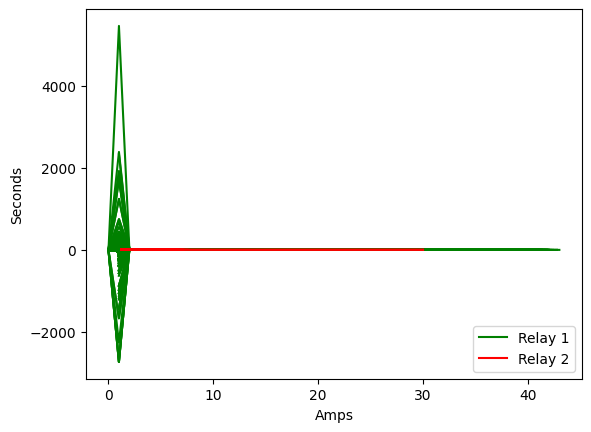

In [189]:
episodes = 50
stop = False
for episode in range(1,episodes+1):
  state = env.reset()
  done = False
  score = 0

  while not done:

    action = env.action_space.sample()
    x_rl1_state, reward, done, info = env.step(action)
    env.render()
    score += reward
  print('Episode:{} Score:{}'.format(episode,score))
    #score += reward
    #if score >= 100:
    #  stop = True
    #if stop == True:
    #  break

In [138]:
env.reset()

array([ 1.0355553 ,  2.03210702,  3.02865874,  4.02521047,  5.02176219,
        6.01831392,  7.01486564,  8.01141736,  9.00796909, 10.00452081,
       11.00107254, 11.99762426, 12.99417598, 13.99072771, 14.98727943,
       15.98383116, 16.98038288, 17.97693461, 18.97348633, 19.97003805,
       20.96658978, 21.9631415 , 22.95969323, 23.95624495, 24.95279667,
       25.9493484 , 26.94590012, 27.94245185, 28.93900357, 29.9355553 ])

In [164]:
x_rl1_state, reward, done, info= env.step(action)

In [169]:
info

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'dt': -0.5801703944284626,
 'y_Env_all': True,
 'self.state': True,
 'y_rl1': array([14.22029939,  5.34705494,  3.80210627,  3.12914419,  2.74198524,
         2.48591447,  2.30168171,  2.16146384,  2.05036602,  1.95964652,
         1.88381237,  1.81922494,  1.76337042,  1.71445148,  1.67114591,
         1.63245725,  1.59761892,  1.56603058,  1.53721464,  1.51078596,
         1.48643008,  1.46388749,  1.44294186,  1.4234113 ,  1.4051416 ,
         1.38800107,  1.3718765 ,  1.35666995,  1.3422962 ,  1.32868071]),
 'x_rl2': array([ 1.38919887,  2.38575059,  3.38230232,  4.37885404,  5.37540576,
         6.37195749,  7.36850921,  8.36506094,  9.36161266, 10.35816439,
        11.35471611, 12.35126783, 13.34781956, 14.34437128, 15.34092301,
        16.33747473, 17.33402645, 18.33057818, 19.3271299 , 20.32368163,
        21.32023335, 22.31678507, 23.3133368 , 24.30988852, 25.30644025,
        26.30299197, 27.2995437 , 28.29609542, 29.29264714, 30.28919887])}

In [33]:
x_rl1_state

array([ 2.333608  ,  3.33015972,  4.32671145,  5.32326317,  6.3198149 ,
        7.31636662,  8.31291835,  9.30947007, 10.30602179, 11.30257352,
       12.29912524, 13.29567697, 14.29222869, 15.28878041, 16.28533214,
       17.28188386, 18.27843559, 19.27498731, 20.27153904, 21.26809076,
       22.26464248, 23.26119421, 24.25774593, 25.25429766, 26.25084938,
       27.2474011 , 28.24395283, 29.24050455, 30.23705628, 31.233608  ])

In [34]:
y_rl1_state

NameError: ignored

In [21]:
score

4856

In [22]:
done

True

In [23]:
info

{'dt': nan, 'y_Env': True, 'self.state': True}

### Visiluation

In [24]:
plt.plot(x_rl1_state,y_rl1_state)

NameError: ignored

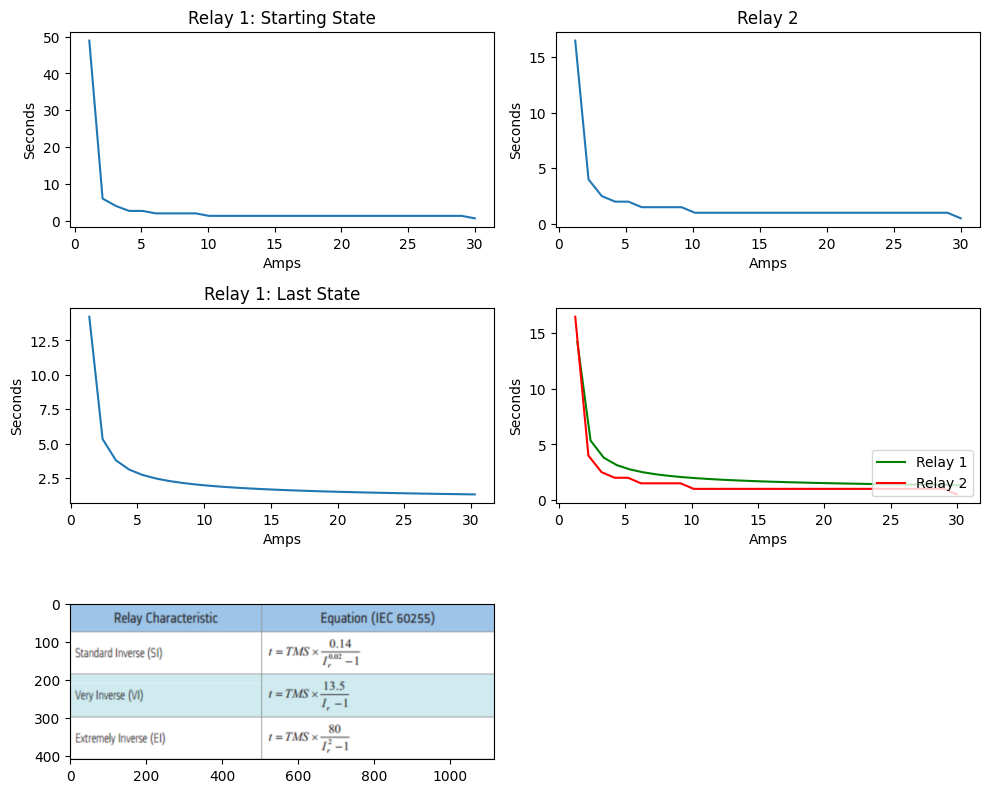

In [170]:
img = mpimg.imread('equ.png')

plt.figure(figsize=(10,8))

plt.subplot(3,2,1)
plt.plot(x_rl1,y_rl1)
plt.title('Relay 1: Starting State')
plt.xlabel('Amps')
plt.ylabel('Seconds')

plt.subplot(3,2,2)
plt.plot(x_rl2,y_rl2)
plt.title('Relay 2')
plt.xlabel('Amps')
plt.ylabel('Seconds')

plt.subplot(3,2,3)
plt.plot(info['x_rl2'],info['y_rl1'])
plt.title('Relay 1: Last State')
plt.xlabel('Amps')
plt.ylabel('Seconds')

plt.subplot(3,2,4)
plt.plot(info['x_rl2'],info['y_rl1'],'g')
plt.plot(x_rl2,y_rl2,'r')
plt.xlabel('Amps')
plt.ylabel('Seconds')
plt.legend(["Relay 1", "Relay 2"], loc ="lower right")

plt.subplot(3,2,5)
plt.imshow(img)
plt.title('')

plt.tight_layout()  # Otomatik düzenleme için
plt.show()

# Keras RL

In [39]:
a = 0

In [47]:
state, r, done, info = env.step(1)

a += r
a

8

In [33]:
for key,value in info.items():
  print("Key:{} -- Value:{}".format(info[key],value))

Key:True -- Value:True
Key:True -- Value:True
Key:True -- Value:True


In [436]:
'''import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers.legacy import Adam'''

'import numpy as np\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense, Flatten\nfrom tensorflow.keras.optimizers.legacy import Adam'

In [196]:
env.observation_space.sample()

array([21.343666], dtype=float32)

In [197]:
states = env.observation_space.shape
actions = env.action_space.n

In [198]:
states

(1,)

In [61]:
actions

3

In [194]:
def build_model(states, actions):
    model = Sequential()
    model.add(Flatten(input_shape=(1,30)))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

In [382]:
del model

NameError: ignored

In [199]:
model = build_model(states, actions)

In [200]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 24)                744       
                                                                 
 dense_1 (Dense)             (None, 24)                600       
                                                                 
 dense_2 (Dense)             (None, 3)                 75        
                                                                 
Total params: 1419 (5.54 KB)
Trainable params: 1419 (5.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [361]:
'''import tensorflow as tf

from keras import __version__

tf.keras.__version__ = __version__'''

'import tensorflow as tf\n\nfrom keras import __version__\n\ntf.keras.__version__ = __version__'

In [362]:
'''from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory'''

'from rl.agents.dqn import DQNAgent\nfrom rl.policy import BoltzmannQPolicy\nfrom rl.memory import SequentialMemory'

In [214]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [215]:
import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

In [216]:
dqn = build_agent(model, actions)
dqn.compile(Adam(learning_rate=1e-3), metrics=['mae'])

In [220]:
import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
history = dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)

Training for 50000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 97s 10ms/step - reward: 1.0845
1 episodes - episode_reward: 501.000 [501.000, 501.000] - loss: 1712.992 - mae: 431.392 - mean_q: 330.499 - dt: 0.589

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 103s 10ms/step - reward: 1.0375
1 episodes - episode_reward: 17355.000 [17355.000, 17355.000] - loss: 1241.826 - mae: 325.927 - mean_q: 263.574 - dt: 0.583

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 104s 10ms/step - reward: 4.5641
4 episodes - episode_reward: 7320.750 [3911.000, 14853.000] - loss: 372.882 - mae: 261.559 - mean_q: 175.858 - dt: 0.529

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 106s 11ms/step - reward: 5.9049
2 episodes - episode_reward: 19224.500 [15238.000, 23211.000] - loss: 357.681 - mae: 267.373 - mean_q: 257.327 - dt: 0.394

Interval 5 (40000 steps perfor

In [48]:
from tensorflow.keras.callbacks import TensorBoard

tensorboard = TensorBoard(log_dir='logs', histogram_freq=1)
# During model training, add tensorboard callback to log metrics

In [49]:
dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)

Training for 50000 steps ...
Interval 1 (0 steps performed)
    1/10000 [..............................] - ETA: 14:44 - reward: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.10/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)


   32/10000 [..............................] - ETA: 5:11 - reward: 1.0000

/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 11 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 12 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 13 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 14 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 15 + 1) instead
  batch

   86/10000 [..............................] - ETA: 2:43 - reward: 1.0000

<ipython-input-7-24d388c21696>:3: RuntimeWarning: invalid value encountered in double_scalars
  value = TMS_Value*((0.14)/(x**0.02-1))


10000/10000 [==============================] - 93s 9ms/step - reward: 1.0000
166 episodes - episode_reward: 60.000 [60.000, 60.000] - loss: 13.951 - mae: 30.379 - mean_q: 42.286 - dt: 1.000 - y_Env: 1.000 - self.state: 1.000

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 97s 10ms/step - reward: 1.0000
167 episodes - episode_reward: 60.000 [60.000, 60.000] - loss: 15.808 - mae: 29.262 - mean_q: 44.314 - dt: 1.000 - y_Env: 1.000 - self.state: 1.000

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 97s 10ms/step - reward: 1.0000
167 episodes - episode_reward: 60.000 [60.000, 60.000] - loss: 15.069 - mae: 28.036 - mean_q: 42.960 - dt: 1.000 - y_Env: 1.000 - self.state: 1.000

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 99s 10ms/step - reward: 1.0000
166 episodes - episode_reward: 60.000 [60.000, 60.000] - loss: 15.050 - mae: 25.567 - mean_q: 42.793 - dt: 1.000 - y_Env: 1.000 - self.st

In [66]:
scores = dqn.test(env, nb_episodes=70, visualize=False)
print(np.mean(scores.history['episode_reward']))

Testing for 70 episodes ...
Episode 1: reward: 6000.000, steps: 60
Episode 2: reward: 6000.000, steps: 60
Episode 3: reward: 6000.000, steps: 60
Episode 4: reward: 6000.000, steps: 60
Episode 5: reward: 6000.000, steps: 60
Episode 6: reward: 6000.000, steps: 60
Episode 7: reward: 6000.000, steps: 60
Episode 8: reward: 6000.000, steps: 60
Episode 9: reward: 6000.000, steps: 60
Episode 10: reward: 6000.000, steps: 60
Episode 11: reward: 6000.000, steps: 60
Episode 12: reward: 6000.000, steps: 60
Episode 13: reward: 6000.000, steps: 60
Episode 14: reward: 6000.000, steps: 60
Episode 15: reward: 6000.000, steps: 60
Episode 16: reward: 6000.000, steps: 60
Episode 17: reward: 6000.000, steps: 60
Episode 18: reward: 6000.000, steps: 60
Episode 19: reward: 6000.000, steps: 60
Episode 20: reward: 6000.000, steps: 60
Episode 21: reward: 6000.000, steps: 60
Episode 22: reward: 6000.000, steps: 60
Episode 23: reward: 6000.000, steps: 60
Episode 24: reward: 6000.000, steps: 60
Episode 25: reward: 6

In [462]:
import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

In [463]:
dqn.test(env,visualize=False)

Testing for 1 episodes ...


<ipython-input-419-24d388c21696>:3: RuntimeWarning: invalid value encountered in double_scalars
  value = TMS_Value*((0.14)/(x**0.02-1))


KeyboardInterrupt: ignored

In [445]:
 import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a trained DQN agent and an environment

# Function to visualize Q-values for different states
def visualize_q_values(agent, states):
    q_values = []
    for state in states:
        q_values.append(agent.get_q_values(state))  # Assuming agent has a method to get Q-values for a state

    q_values = np.array(q_values)

    plt.figure(figsize=(10, 6))
    for action_idx in range(agent.action_space):
        plt.plot(q_values[:, action_idx], label=f'Action {action_idx}')
    plt.xlabel('States')
    plt.ylabel('Q-values')
    plt.title('Q-values for different actions in states')
    plt.legend()
    plt.show()

# Function to visualize action distribution
def visualize_action_distribution(agent, episodes):
    action_counts = np.zeros(agent.action_space)
    for episode in episodes:
        actions = agent.get_actions(episode)  # Assuming agent has a method to get actions taken in an episode
        unique, counts = np.unique(actions, return_counts=True)
        for idx, action in enumerate(unique):
            action_counts[action] += counts[idx]

    plt.figure(figsize=(8, 6))
    plt.bar(range(agent.action_space), action_counts)
    plt.xlabel('Actions')
    plt.ylabel('Frequency')
    plt.title('Action Distribution')
    plt.show()

# Assuming you have states and episodes data available for visualization
# states = [...]  # List of states
# episodes = [...]  # List of episodes

# Visualizing Q-values
visualize_q_values(dqn, states)

# Visualizing action distribution
visualize_action_distribution(dqn, 10)
